In [8]:
import os
import torch
import torch.nn as nn
import torchvision
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor, Resize, Compose
from tqdm import tqdm
import cv2
import numpy as np
import tensorflow as tf

# Define the CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc = nn.Linear(in_features=32 * 50 * 50, out_features=15)
    
    def forward(self, x):
        x = self.conv1(x)
        x = nn.functional.relu(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = nn.functional.relu(x)
        x = self.pool2(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

# Define the dataset
train_transforms = Compose([
    Resize((200, 200)),
    ToTensor()
])

test_transforms = Compose([
    Resize((200, 200)),
    ToTensor()
])

# frame_path = os.path.join(os.getcwd(), "frames")

train_dataset = ImageFolder(root='D:\IEEE\project\Dataset2\TrainFrame', transform=train_transforms)
test_dataset = ImageFolder(root='D:\IEEE\project\Dataset2\TestFrame', transform=test_transforms)

# Define the dataloaders
train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=4, shuffle=False)

classes = ('barbellbicepscurl', 'benchpress', 'chestflymachine', 'deadlift', 'hammercurl', 'hiptrhust', 'inclinebenchpress', 'lateralraise', 'latpulldown', 'legextension', 'legraises' ,'pullup', 'pushupvid', 'tricepdips', 'triceppushdown')

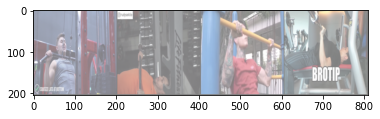

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# function to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(train_dataloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

# # print labels
# if len(labels) > 0:
#     print(' '.join(f'{classes[labels[j]]:5s}' for j in range(len(labels))))
# else:
#     print("Labels array is empty")

In [10]:
# Define the device to run the model on
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = CNN().to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print(device)

print(model.fc.out_features)

# unique_labels = torch.unique(labels)
# print(labels)

cpu
15


In [11]:
# Train the model
for epoch in range(25):
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(tqdm(train_dataloader)):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
     
    train_loss = running_loss / len(train_dataloader)
    train_acc = 100 * correct / total
    print(f"Epoch {epoch+1}, Train Loss: {train_loss:.3f}, Train Acc: {train_acc:.2f}%")

100%|██████████████████████████████████████████████████████████████████████████| 13632/13632 [1:01:46<00:00,  3.68it/s]


Epoch 1, Train Loss: 0.063, Train Acc: 98.28%


100%|██████████████████████████████████████████████████████████████████████████| 13632/13632 [1:04:59<00:00,  3.50it/s]


Epoch 2, Train Loss: 0.010, Train Acc: 99.90%


100%|██████████████████████████████████████████████████████████████████████████| 13632/13632 [1:05:12<00:00,  3.48it/s]


Epoch 3, Train Loss: 0.011, Train Acc: 99.89%


100%|██████████████████████████████████████████████████████████████████████████| 13632/13632 [1:02:36<00:00,  3.63it/s]


Epoch 4, Train Loss: 0.011, Train Acc: 99.95%


100%|██████████████████████████████████████████████████████████████████████████| 13632/13632 [1:03:40<00:00,  3.57it/s]


Epoch 5, Train Loss: 0.009, Train Acc: 99.95%


100%|██████████████████████████████████████████████████████████████████████████| 13632/13632 [1:06:25<00:00,  3.42it/s]


Epoch 6, Train Loss: 0.009, Train Acc: 99.95%


100%|██████████████████████████████████████████████████████████████████████████| 13632/13632 [1:04:26<00:00,  3.53it/s]


Epoch 7, Train Loss: 0.006, Train Acc: 99.96%


100%|██████████████████████████████████████████████████████████████████████████| 13632/13632 [1:03:21<00:00,  3.59it/s]


Epoch 8, Train Loss: 0.013, Train Acc: 99.95%


100%|██████████████████████████████████████████████████████████████████████████| 13632/13632 [1:02:54<00:00,  3.61it/s]


Epoch 9, Train Loss: 0.010, Train Acc: 99.95%


100%|██████████████████████████████████████████████████████████████████████████| 13632/13632 [1:00:35<00:00,  3.75it/s]


Epoch 10, Train Loss: 0.005, Train Acc: 99.97%


100%|██████████████████████████████████████████████████████████████████████████| 13632/13632 [1:01:44<00:00,  3.68it/s]


Epoch 11, Train Loss: 0.005, Train Acc: 99.98%


100%|██████████████████████████████████████████████████████████████████████████| 13632/13632 [1:01:47<00:00,  3.68it/s]


Epoch 12, Train Loss: 0.004, Train Acc: 99.98%


100%|██████████████████████████████████████████████████████████████████████████| 13632/13632 [1:01:50<00:00,  3.67it/s]


Epoch 13, Train Loss: 0.003, Train Acc: 99.99%


100%|██████████████████████████████████████████████████████████████████████████| 13632/13632 [1:01:22<00:00,  3.70it/s]


Epoch 14, Train Loss: 0.013, Train Acc: 99.95%


100%|██████████████████████████████████████████████████████████████████████████| 13632/13632 [1:01:51<00:00,  3.67it/s]


Epoch 15, Train Loss: 0.009, Train Acc: 99.98%


100%|██████████████████████████████████████████████████████████████████████████| 13632/13632 [1:01:45<00:00,  3.68it/s]


Epoch 16, Train Loss: 0.000, Train Acc: 100.00%


100%|██████████████████████████████████████████████████████████████████████████| 13632/13632 [1:02:08<00:00,  3.66it/s]


Epoch 17, Train Loss: 0.000, Train Acc: 100.00%


100%|██████████████████████████████████████████████████████████████████████████| 13632/13632 [1:01:58<00:00,  3.67it/s]


Epoch 18, Train Loss: 0.000, Train Acc: 100.00%


100%|██████████████████████████████████████████████████████████████████████████| 13632/13632 [1:02:17<00:00,  3.65it/s]


Epoch 19, Train Loss: 0.000, Train Acc: 100.00%


100%|██████████████████████████████████████████████████████████████████████████| 13632/13632 [1:02:30<00:00,  3.63it/s]


Epoch 20, Train Loss: 0.000, Train Acc: 100.00%


100%|██████████████████████████████████████████████████████████████████████████| 13632/13632 [1:07:48<00:00,  3.35it/s]


Epoch 21, Train Loss: 0.000, Train Acc: 100.00%


100%|██████████████████████████████████████████████████████████████████████████| 13632/13632 [1:03:02<00:00,  3.60it/s]


Epoch 22, Train Loss: 0.000, Train Acc: 100.00%


100%|██████████████████████████████████████████████████████████████████████████| 13632/13632 [1:03:49<00:00,  3.56it/s]


Epoch 23, Train Loss: 0.000, Train Acc: 100.00%


100%|██████████████████████████████████████████████████████████████████████████| 13632/13632 [1:02:40<00:00,  3.62it/s]


Epoch 24, Train Loss: 0.000, Train Acc: 100.00%


100%|██████████████████████████████████████████████████████████████████████████| 13632/13632 [1:02:30<00:00,  3.64it/s]

Epoch 25, Train Loss: 0.000, Train Acc: 100.00%


In [12]:
PATH = './yoga_net.pth'
torch.save(model.state_dict(), PATH)

In [13]:
# Test the model
test_dataset = ImageFolder(root='D:\IEEE\project\Dataset2\TestFrame', transform=test_transforms)

# Define the dataloaders
test_dataloader = DataLoader(test_dataset, batch_size=4, shuffle=False)

correct = 0
total = 0
with torch.no_grad():
    for data in test_dataloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

Accuracy of the network on the test images: 32 %


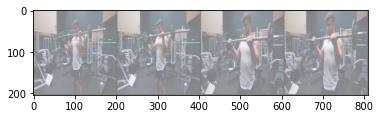

GroundTruth:  barbellbicepscurl barbellbicepscurl barbellbicepscurl barbellbicepscurl
Predicted:  barbellbicepscurl barbellbicepscurl barbellbicepscurl barbellbicepscurl


In [14]:
dataiter = iter(test_dataloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

outputs = model(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))